In [2]:
library(ggplot2)
library(dplyr)
library(glue)
library(gridExtra)

In [11]:
output = read.table("/Users/shayecarver/condPCA/ASHG/Simulation/SIM_output.txt",header=TRUE)
output = output %>% distinct()
output[is.na(output$flag),]$flag = "7_cts"
state_type = unique(output$state_type)
num_cells = unique(output$flag)
tail(output)
dim(output)

,seed,method,state_type,dim,total_cells,perc_genes,perc_cells,flag,ct_in_state,adj.rsq,max.rsq,max.rsq_sub,total_cells_can_occupy_state,total_cells_occupy_state,total_genes,total_genes_in_state
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
2380,1,NMF,across_cts,105,40000,0.3,0.5,cts_100,all,0.009233059,0.0015440662,0.0015440662,40052,20026,2527,758
2381,2,NMF,across_cts,105,40000,0.3,0.5,cts_100,all,0.006631004,0.0018005241,0.0018005241,40052,20026,2527,758
2382,4,NMF,across_cts,105,40000,0.3,0.3,cts_100,all,0.003593089,0.0006343547,0.0006343547,40052,12015,2527,758
2383,9,NMF,across_cts,105,40000,0.3,0.3,cts_100,all,0.011893207,0.0032015433,0.0032015433,40052,12015,2527,758
2384,10,NMF,across_cts,105,40000,0.3,0.3,cts_100,all,0.007881001,0.0012059042,0.0012059042,40052,12015,2527,758
2385,3,NMF,across_cts,105,40000,0.3,0.5,cts_100,all,0.012650407,0.0051080532,0.0051080532,40052,20026,2527,758


[1] 2385   16

In [12]:
tmp_df <- na.omit(output)

sd = tmp_df %>% group_by(method,state_type,dim, total_cells, flag, perc_genes, perc_cells) %>% 
                      summarise(across(c(adj.rsq,max.rsq,max.rsq_sub),sd),
                    .groups = 'drop') %>%
                      as.data.frame()


counts = tmp_df %>% group_by(method,state_type,dim, total_cells, flag, perc_genes, perc_cells) %>% 
                      summarise(n = n())%>%
                      as.data.frame()

colnames(sd)[(length(colnames(sd))-2) : length(colnames(sd)) ] = paste0("sd","_", colnames(sd)[(length(colnames(sd))-2) : length(colnames(sd)) ] )


mean = tmp_df %>% group_by(method,state_type,dim, total_cells, flag, perc_genes, perc_cells) %>% 
                      summarise(across(c(adj.rsq,max.rsq,max.rsq_sub),mean),
                    .groups = 'drop') %>%
                      as.data.frame()

all_merged = merge(mean, merge(sd,counts,by=colnames(sd)[1:7]), by=colnames(sd)[1:7] )
all_merged$conf_int_max.rsq_sub = all_merged$sd_max.rsq_sub / sqrt(all_merged$n) * qnorm(0.975)
all_merged$perc_genes_perc_cells = paste(all_merged$perc_genes, all_merged$perc_cells, sep=", ")

`summarise()` has grouped output by 'method', 'state_type', 'dim',
'total_cells', 'flag', 'perc_genes'. You can override using the `.groups`
argument.


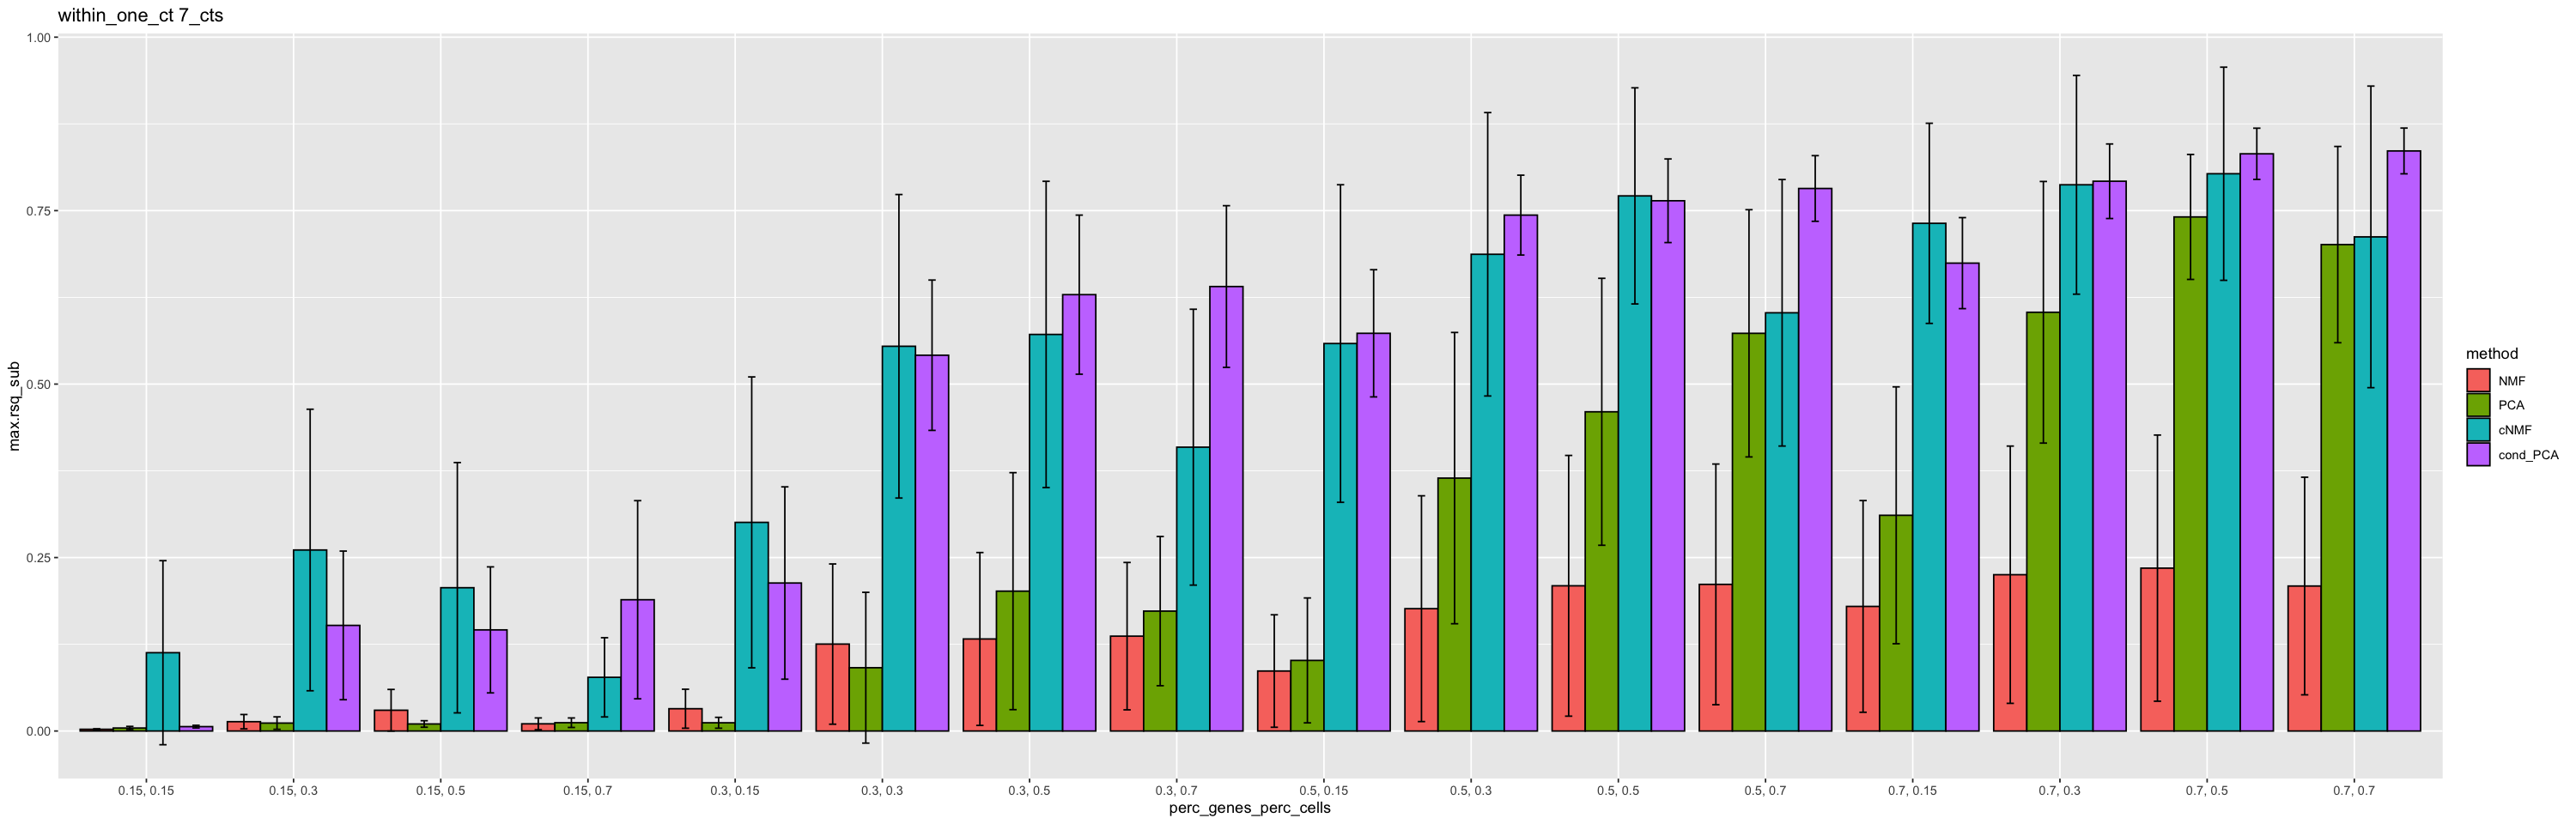

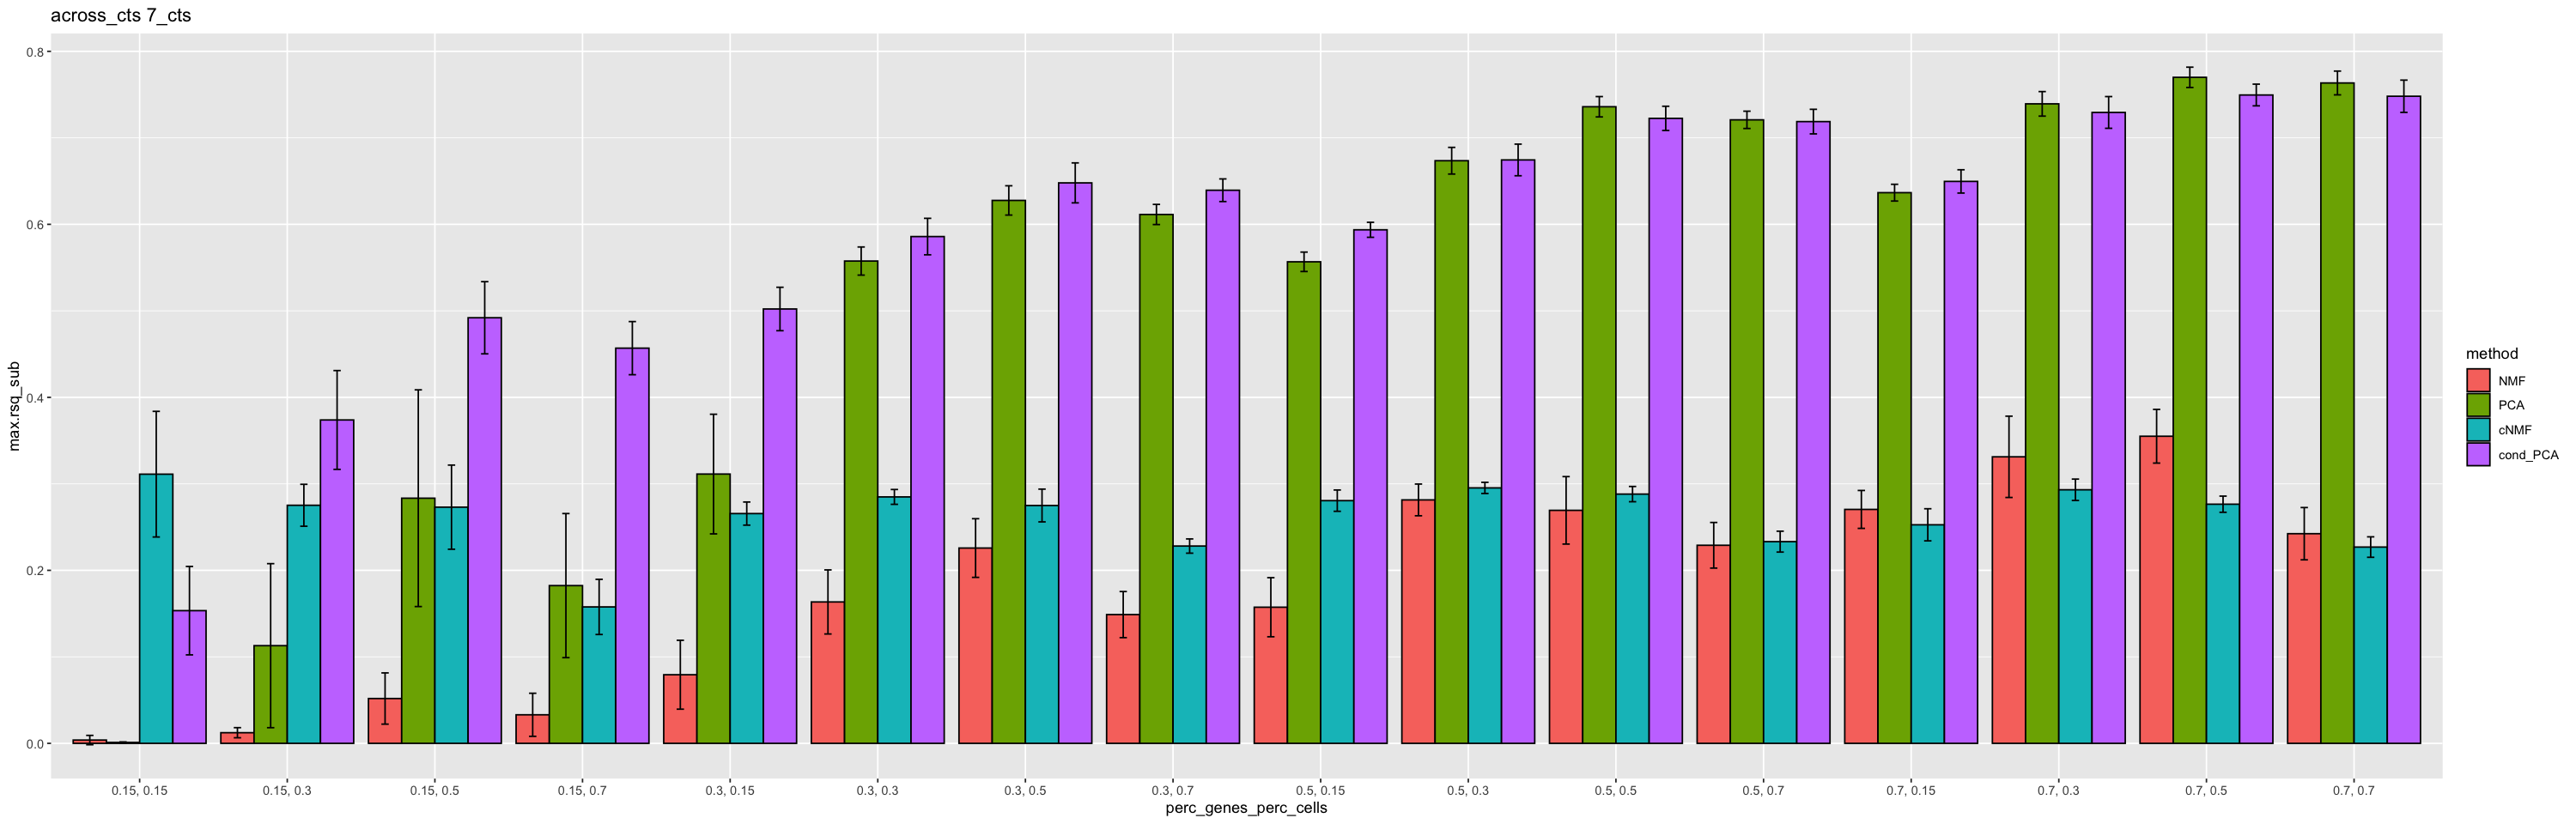

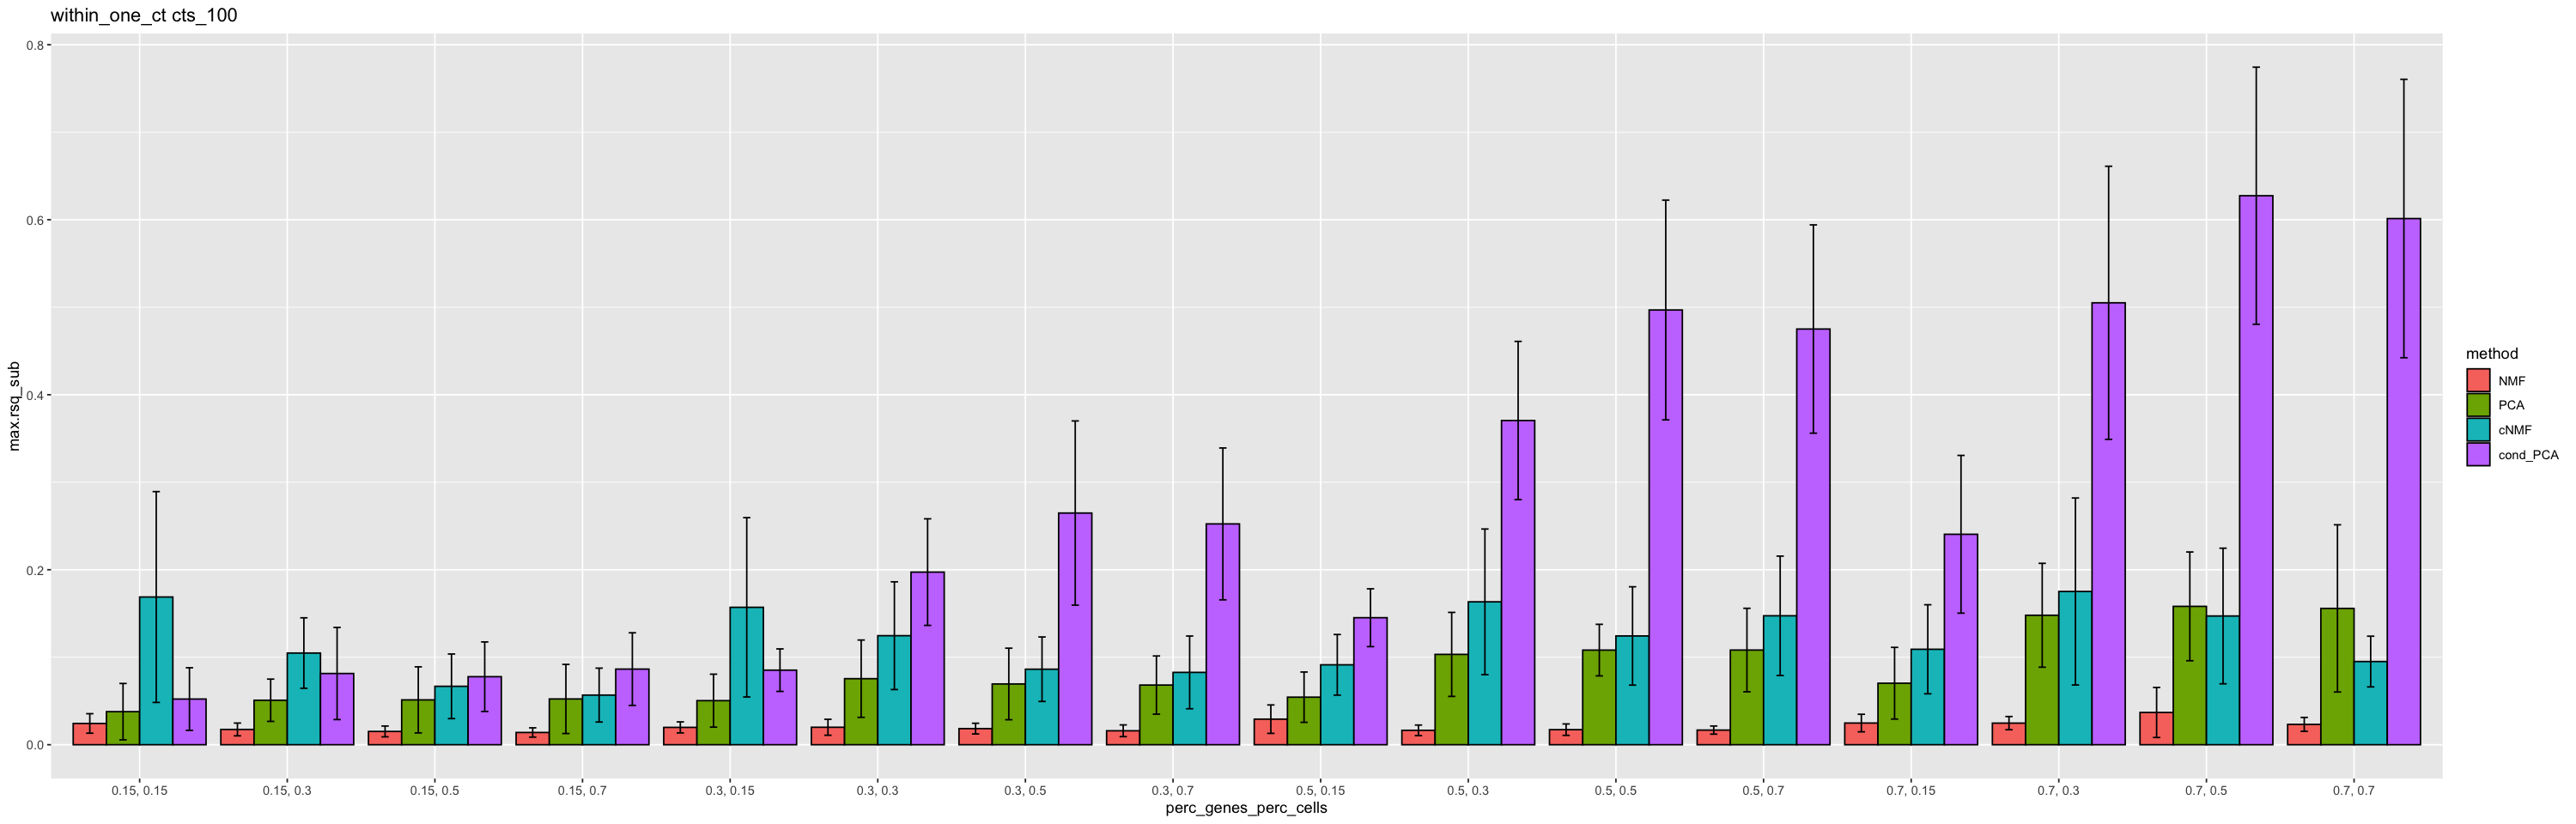

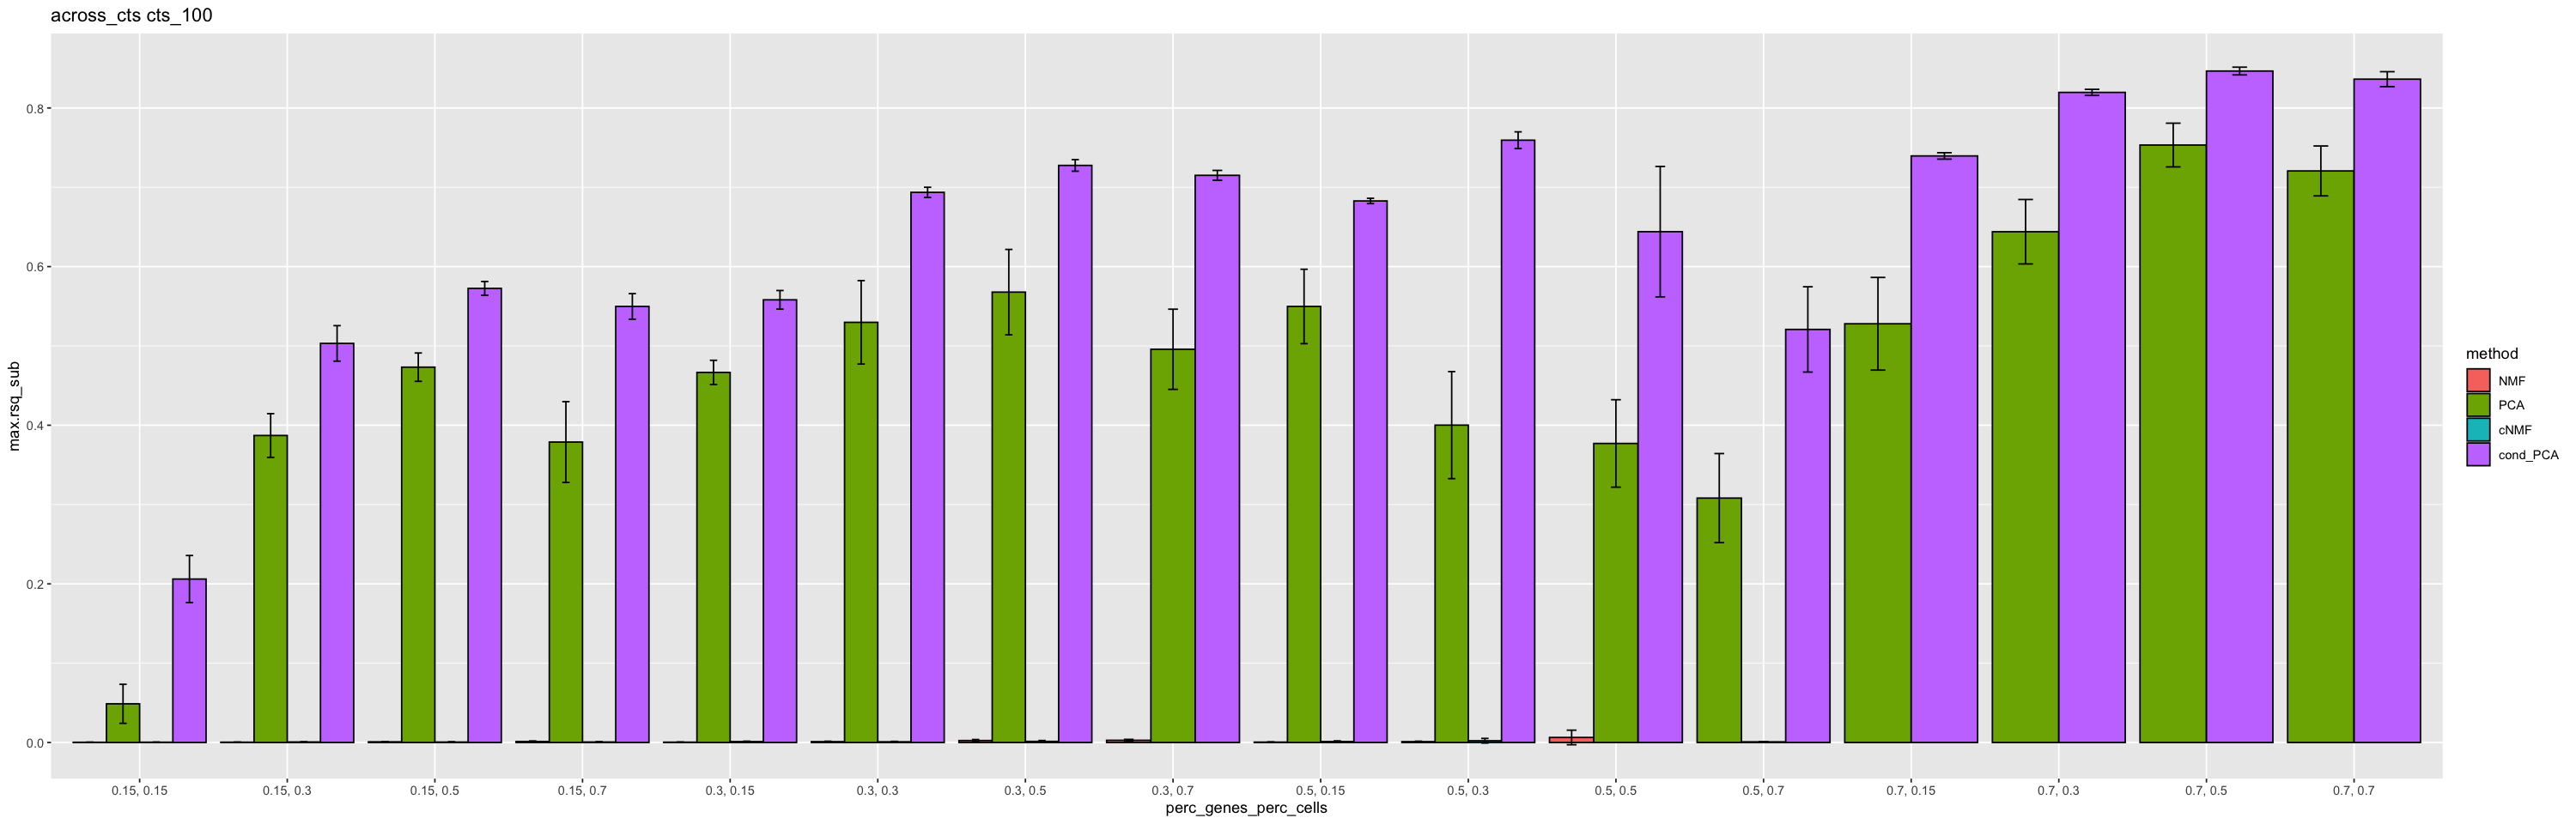

In [13]:
options(repr.plot.width=10, repr.plot.height=8)

num_cells = c("7_cts","cts_100")

for (num_cells_ in num_cells){
    for (state_type_ in state_type){
    
        options(repr.plot.width=25, repr.plot.height=8)
        #all_merged
        
        tmp_df = all_merged[all_merged$state_type == state_type_ & all_merged$flag == num_cells_,]

        # plot where perc genes equals perc cells
        p = ggplot(data=tmp_df, aes(x=perc_genes_perc_cells, y=max.rsq_sub, fill=method)) +
         geom_bar(stat="identity", color="black", position=position_dodge()) +
  geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.2,
                 position=position_dodge(.9)) + ggtitle(glue("{state_type_} {num_cells_}"))
        print(p)
    }
    
}

In [14]:
common = all_merged[all_merged$perc_genes_perc_cells == "0.7, 0.7",]
common$Freq = "Common"
common

,method,state_type,dim,total_cells,flag,perc_genes,perc_cells,adj.rsq,max.rsq,max.rsq_sub,sd_adj.rsq,sd_max.rsq,sd_max.rsq_sub,n,conf_int_max.rsq_sub,perc_genes_perc_cells,Freq
,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
16,NMF,across_cts,10,20000,7_cts,0.7,0.7,0.57647485,0.24238291,0.24238291,0.080286138,0.04874719,0.04874719,10,0.030213268,"0.7, 0.7",Common
43,NMF,within_one_ct,10,20000,7_cts,0.7,0.7,0.64012421,0.57464593,0.20896447,0.124408216,0.08840487,0.25302194,10,0.156821739,"0.7, 0.7",Common
59,NMF,within_one_ct,105,40000,cts_100,0.7,0.7,0.56663998,0.56645132,0.02328965,0.011282895,0.01057551,0.01214916,9,0.007937305,"0.7, 0.7",Common
75,PCA,across_cts,10,20000,7_cts,0.7,0.7,0.80760774,0.76343943,0.76343943,0.011920063,0.02217506,0.02217506,10,0.013743995,"0.7, 0.7",Common
91,PCA,across_cts,105,40000,cts_100,0.7,0.7,0.83428407,0.72060111,0.72060111,0.004194847,0.05075488,0.05075488,10,0.031457620,"0.7, 0.7",Common
107,PCA,within_one_ct,10,20000,7_cts,0.7,0.7,0.78396504,0.33910972,0.70105080,0.083333191,0.09437507,0.22820856,10,0.141442532,"0.7, 0.7",Common
123,PCA,within_one_ct,105,40000,cts_100,0.7,0.7,0.53405464,0.21654596,0.15580665,0.070866569,0.09007380,0.15417209,10,0.095555095,"0.7, 0.7",Common
139,cNMF,across_cts,10,20000,7_cts,0.7,0.7,0.82071980,0.22690502,0.22690502,0.015147655,0.01908218,0.01908218,10,0.011827042,"0.7, 0.7",Common
165,cNMF,within_one_ct,10,20000,7_cts,0.7,0.7,0.85075852,0.82156638,0.71216623,0.157445394,0.14613336,0.35067195,10,0.217344731,"0.7, 0.7",Common


In [15]:
across_7 = all_merged[all_merged$flag == "7_cts" & all_merged$state_type == "across_cts" & all_merged$perc_genes_perc_cells == "0.15, 0.7",]
across_7$Freq = "Rare"

across_100 = all_merged[all_merged$flag == "cts_100" & all_merged$state_type == "across_cts" & all_merged$perc_genes_perc_cells == "0.15, 0.7",]
across_100$Freq = "Rare"

within_7 = all_merged[all_merged$flag == "7_cts" & all_merged$state_type == "within_one_ct" & all_merged$perc_genes_perc_cells == "0.3, 0.7",]
within_7$Freq = "Rare"

within_100 = all_merged[all_merged$flag == "cts_100" & all_merged$state_type == "within_one_ct" & all_merged$perc_genes_perc_cells == "0.3, 0.5",]
within_100$Freq = "Rare"

In [16]:
all = rbind(across_7, within_7, across_100,within_100, common)
all

,method,state_type,dim,total_cells,flag,perc_genes,perc_cells,adj.rsq,max.rsq,max.rsq_sub,sd_adj.rsq,sd_max.rsq,sd_max.rsq_sub,n,conf_int_max.rsq_sub,perc_genes_perc_cells,Freq
,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
4,NMF,across_cts,10,20000,7_cts,0.15,0.7,0.056879827,0.0330134680,0.0330134680,0.057030412,0.0401768796,0.0401768796,10,0.0249014304,"0.15, 0.7",Rare
63,PCA,across_cts,10,20000,7_cts,0.15,0.7,0.220315771,0.1823569627,0.1823569627,0.152010285,0.1343960492,0.1343960492,10,0.0832980036,"0.15, 0.7",Rare
127,cNMF,across_cts,10,20000,7_cts,0.15,0.7,0.351254483,0.1577179759,0.1577179759,0.110357662,0.0514418116,0.0514418116,10,0.0318833793,"0.15, 0.7",Rare
185,cond_PCA,across_cts,10,20000,7_cts,0.15,0.7,0.465337293,0.4568740861,0.4568740861,0.046276220,0.0495782038,0.0495782038,10,0.0307283244,"0.15, 0.7",Rare
35,NMF,within_one_ct,10,20000,7_cts,0.30,0.7,0.568876505,0.5625497250,0.1367132902,0.029569661,0.0317997396,0.1713434769,10,0.1061978358,"0.3, 0.7",Rare
99,PCA,within_one_ct,10,20000,7_cts,0.30,0.7,0.554599573,0.2668870479,0.1728094025,0.068833601,0.0191091063,0.1734711147,10,0.1075165351,"0.3, 0.7",Rare
157,cNMF,within_one_ct,10,20000,7_cts,0.30,0.7,0.679048394,0.6532110297,0.4090745951,0.158157289,0.1873415466,0.3207598117,10,0.1988053379,"0.3, 0.7",Rare
221,cond_PCA,within_one_ct,10,20000,7_cts,0.30,0.7,0.240121611,0.2284337048,0.6405936039,0.108443289,0.1162022294,0.1880079695,10,0.1165264056,"0.3, 0.7",Rare
20,NMF,across_cts,105,40000,cts_100,0.15,0.7,0.004754796,0.0012803351,0.0012803351,0.002710916,0.0011064120,0.0011064120,10,0.0006857487,"0.15, 0.7",Rare


[1] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE

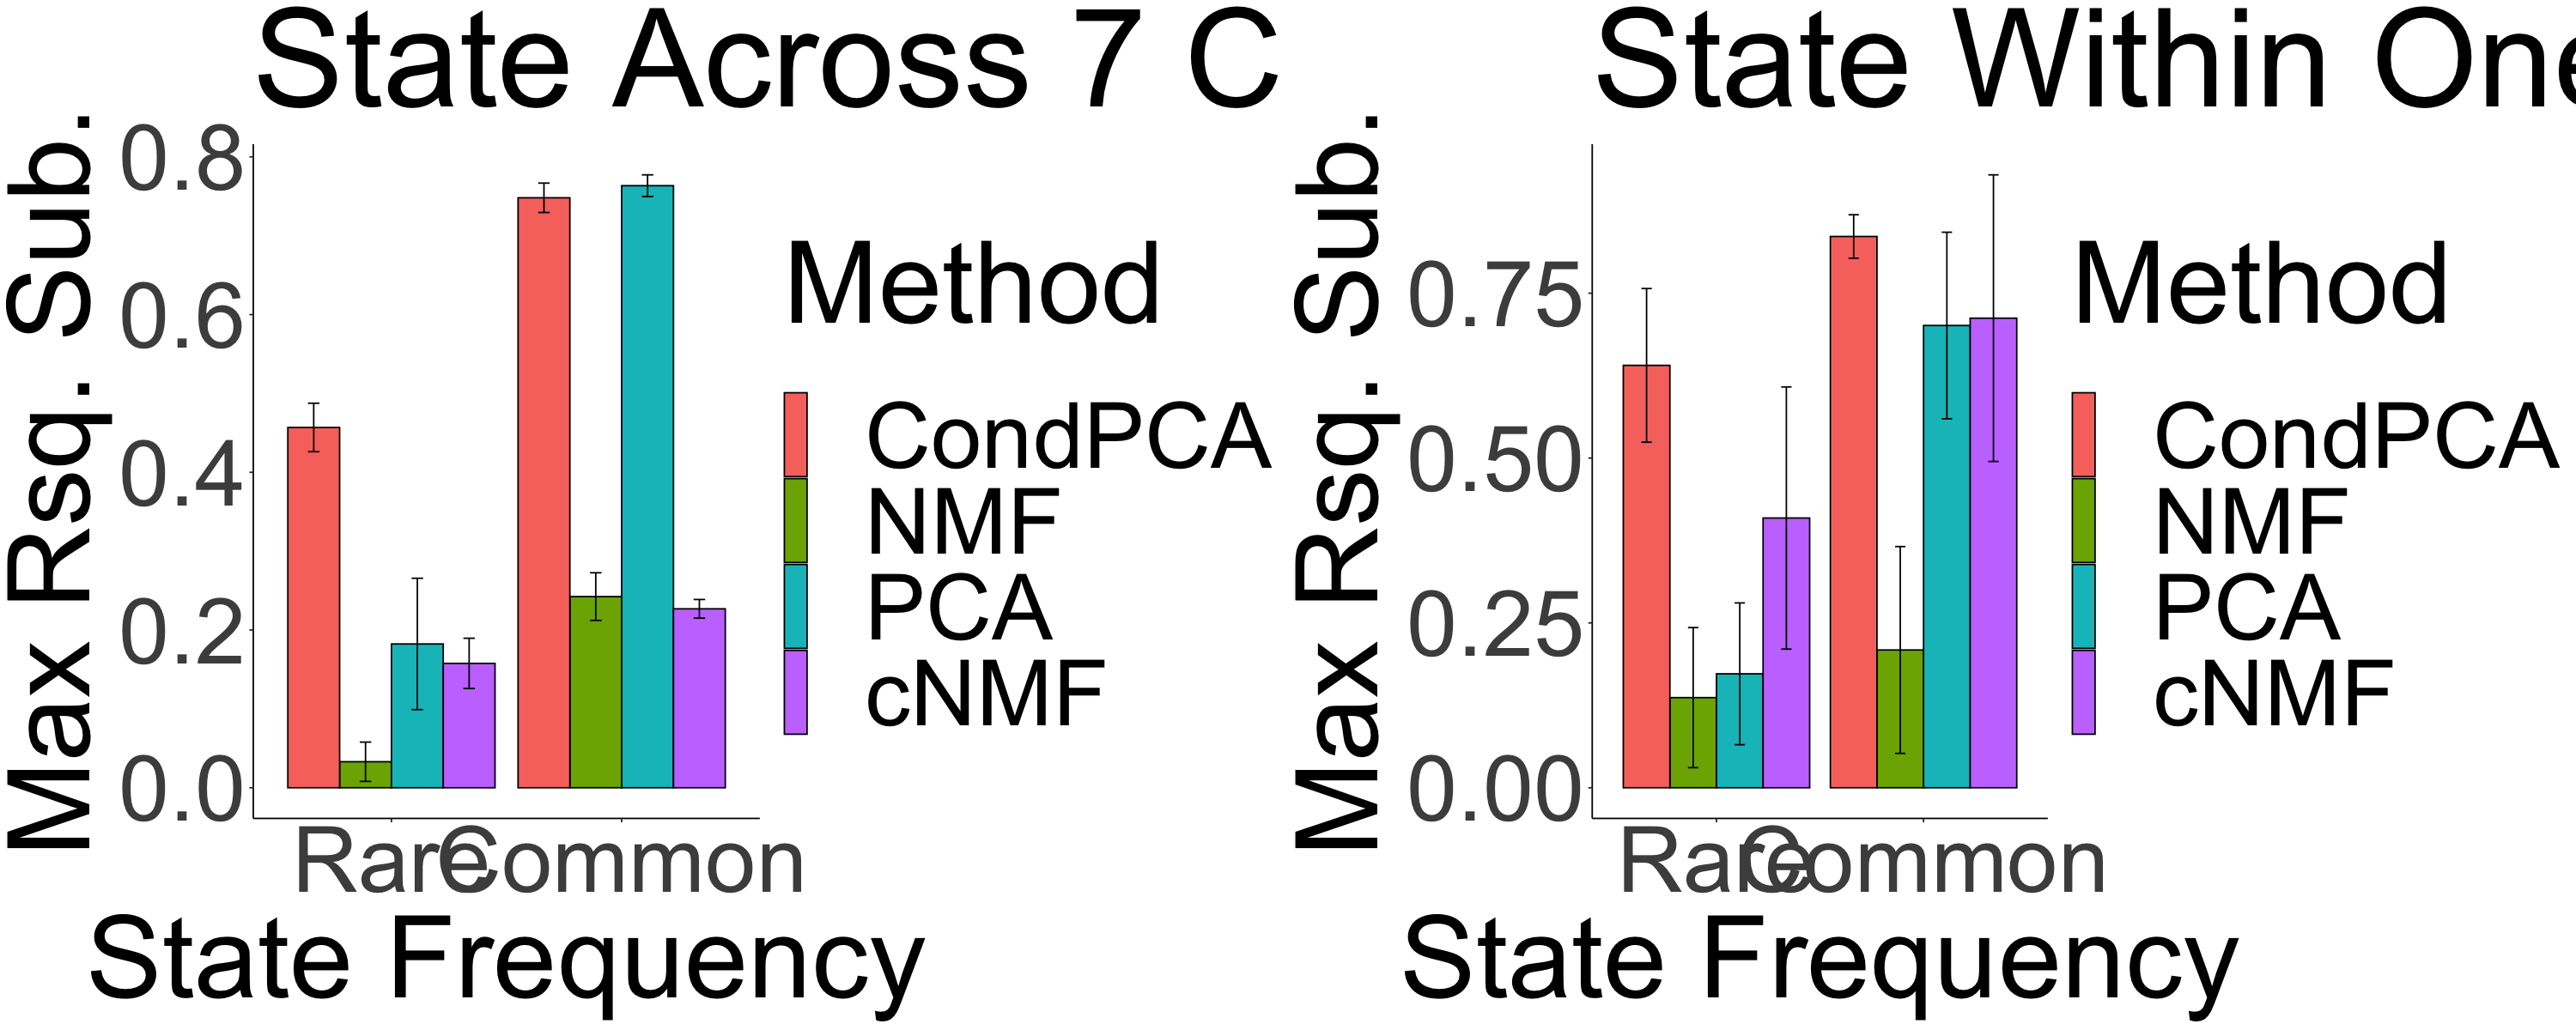

In [52]:

options(repr.plot.width=25, repr.plot.height=10)
pd = 0.2

type = "across_cts"
ct = "7_cts"

tmp_df = all[(all$flag == ct & all$state_type == type),]

tmp_df$Freq = factor(tmp_df$Freq, levels = c("Rare", "Common"))
# a=ggplot(tmp_df, aes(x=Freq, y=max.rsq_sub, group=method, color=method)) + 
#   geom_line(aes(group = method), position=position_dodge(width=pd),linetype = "dashed") +
#   geom_point(size = 4, position=position_dodge(width=pd))+
#   geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.1,
#                  position=position_dodge(pd))+theme_classic()+ ggtitle("State Across 7 Cell Types")

tmp_df[tmp_df$method == "cond_PCA",]$method = "CondPCA"
a=ggplot(data=tmp_df, aes(x=Freq, y=max.rsq_sub, fill=method)) +
         geom_bar(stat="identity", color="black", position=position_dodge()) +
  geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.2,
                 position=position_dodge(0.9)) + ggtitle("State Across 7 Cell Types") + ylab("Max Rsq. Sub.") + theme_classic()+
    theme(text = element_text(size=80))+labs(fill="Method")+xlab("State Frequency")

type = "within_one_ct"
ct = "7_cts"

tmp_df = all[(all$flag == ct & all$state_type == type),]

tmp_df$Freq = factor(tmp_df$Freq, levels = c("Rare", "Common"))
# b = ggplot(tmp_df, aes(x=Freq, y=max.rsq_sub, group=method, color=method)) + 
#   geom_line(aes(group = method), position=position_dodge(width=pd),linetype = "dashed") +
#   geom_point(size = 4, position=position_dodge(width=pd))+
#   geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.1,
#                  position=position_dodge(pd))+theme_classic() + ggtitle("State Within One Cell Type, 7 Cell Types")
tmp_df[tmp_df$method == "cond_PCA",]$method = "CondPCA"
b=ggplot(data=tmp_df, aes(x=Freq, y=max.rsq_sub, fill=method)) +
         geom_bar(stat="identity", color="black", position=position_dodge()) +
  geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.2,
                 position=position_dodge(0.9)) + ggtitle("State Within One of 7 Cell Types") + ylab("Max Rsq. Sub.") + theme_classic()+
    theme(text = element_text(size=80))+labs(fill="Method")+xlab("State Frequency")

grid.arrange(a, b, ncol=2)

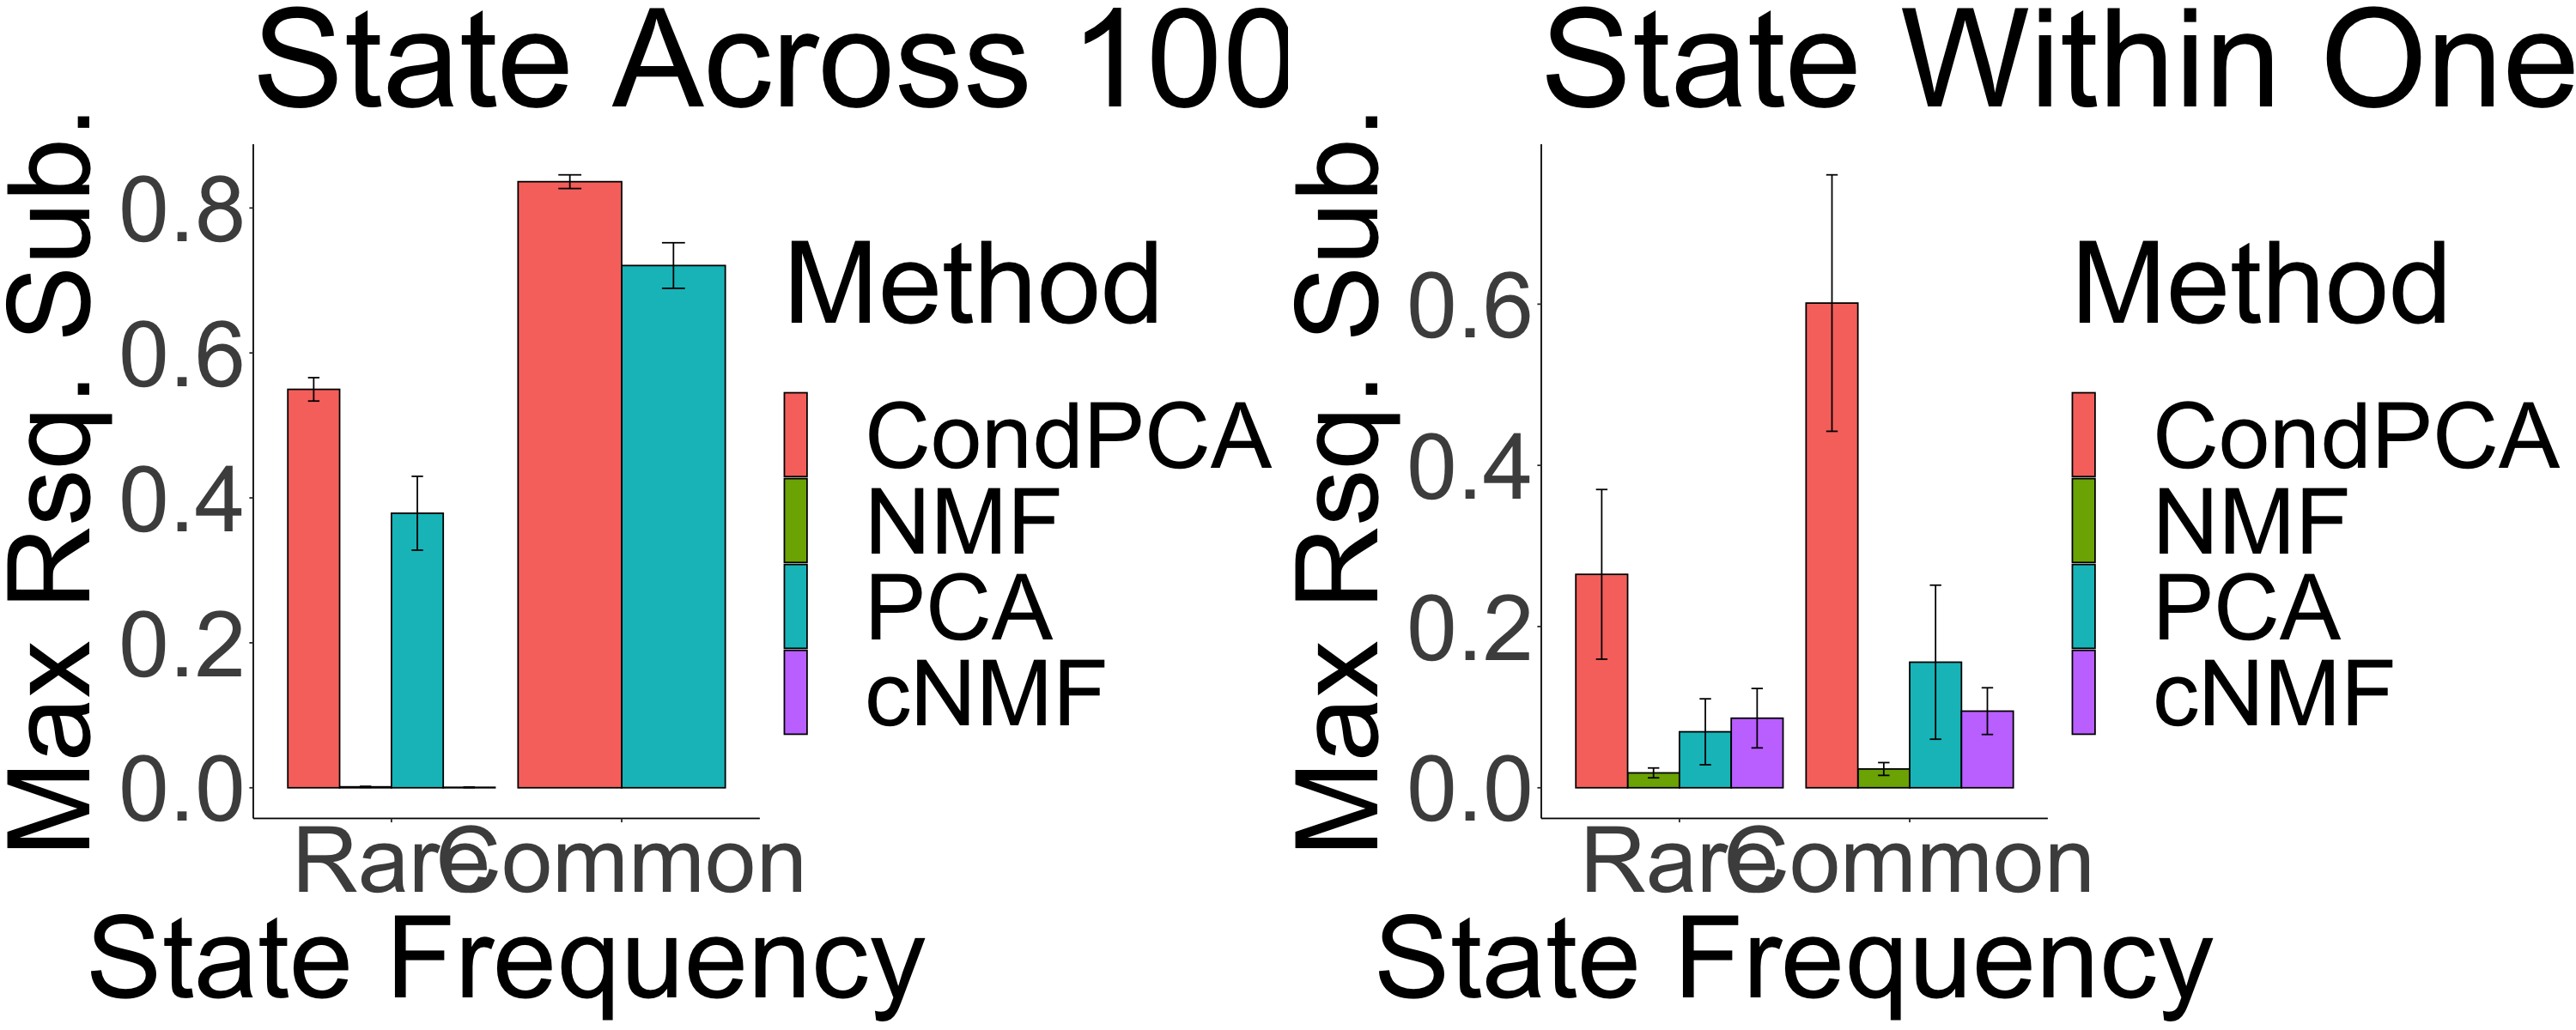

In [53]:
type = "across_cts"
ct = "cts_100"

tmp_df = all[(all$flag == ct & all$state_type == type),]

tmp_df$Freq = factor(tmp_df$Freq, levels = c("Rare", "Common"))
# a = ggplot(tmp_df, aes(x=Freq, y=max.rsq_sub, group=method, color=method)) + 
#   geom_line(aes(group = method), position=position_dodge(width=pd),linetype = "dashed") +
#   geom_point(size = 4, position=position_dodge(width=pd))+
#   geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.1,
#                  position=position_dodge(pd))+theme_classic()+ ggtitle("State Across 100 Cell Types")
tmp_df[tmp_df$method == "cond_PCA",]$method = "CondPCA"
c=ggplot(data=tmp_df, aes(x=Freq, y=max.rsq_sub, fill=method)) +
         geom_bar(stat="identity", color="black", position=position_dodge()) +
  geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.2,
                 position=position_dodge(0.9)) + ggtitle("State Across 100 Cell Types")+ ylab("Max Rsq. Sub.") + theme_classic()+xlab("State Frequency")+
    theme(text = element_text(size=80))+labs(fill="Method")

type = "within_one_ct"
ct = "cts_100"

tmp_df = all[(all$flag == ct & all$state_type == type),]

tmp_df$Freq = factor(tmp_df$Freq, levels = c("Rare", "Common"))
# b = ggplot(tmp_df, aes(x=Freq, y=max.rsq_sub, group=method, color=method)) + 
#   geom_line(aes(group = method), position=position_dodge(width=pd),linetype = "dashed") +
#   geom_point(size = 4, position=position_dodge(width=pd))+
#   geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.1,
#                  position=position_dodge(pd))+theme_classic()+ ggtitle("State Within One Cell Type, 100 Cell Types")
tmp_df[tmp_df$method == "cond_PCA",]$method = "CondPCA"
d=ggplot(data=tmp_df, aes(x=Freq, y=max.rsq_sub, fill=method)) +
         geom_bar(stat="identity", color="black", position=position_dodge()) +
  geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.2,
                 position=position_dodge(0.9)) + ggtitle("State Within One of 100 Cell Types")+ ylab("Max Rsq. Sub.") + theme_classic()+
    theme(text = element_text(size=80))+labs(fill="Method")+xlab("State Frequency")

grid.arrange(c, d, ncol=2)

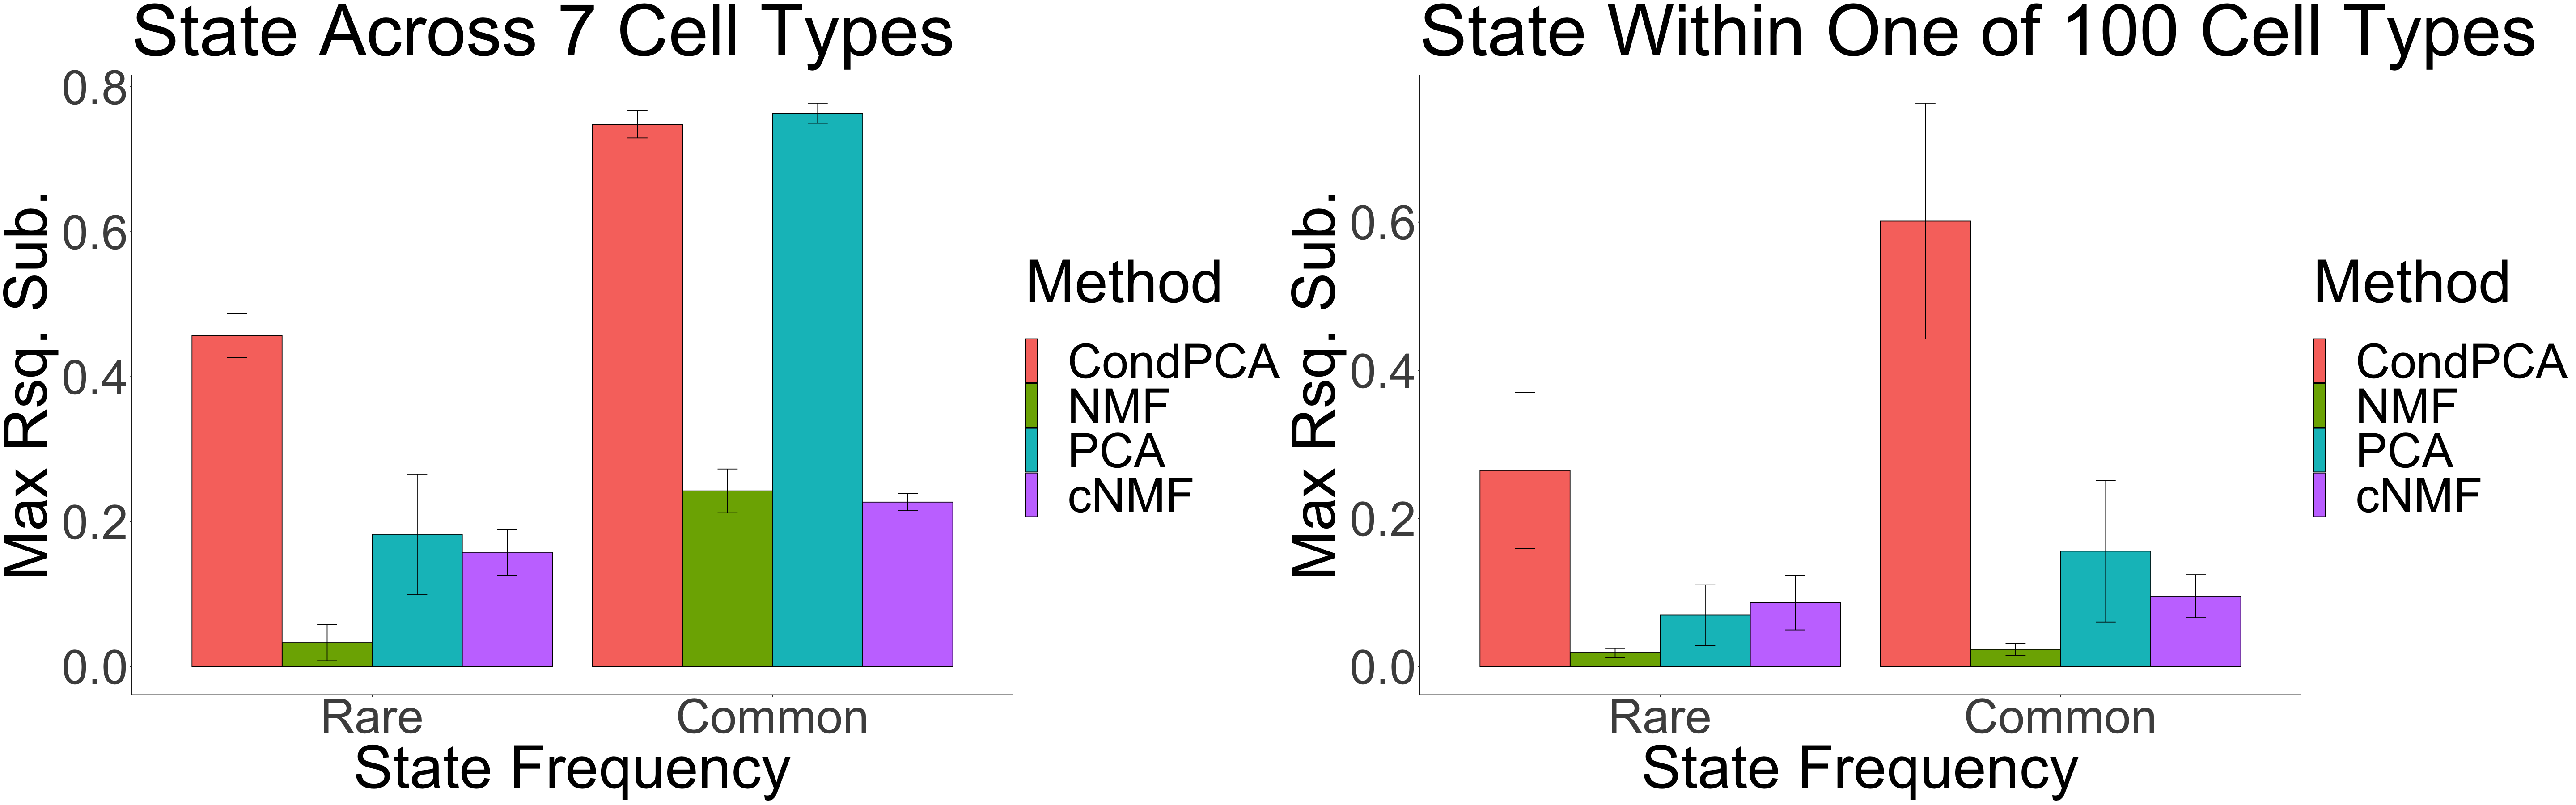

In [58]:
options(repr.plot.width=48, repr.plot.height=15)

grid.arrange(a, d, ncol=2)

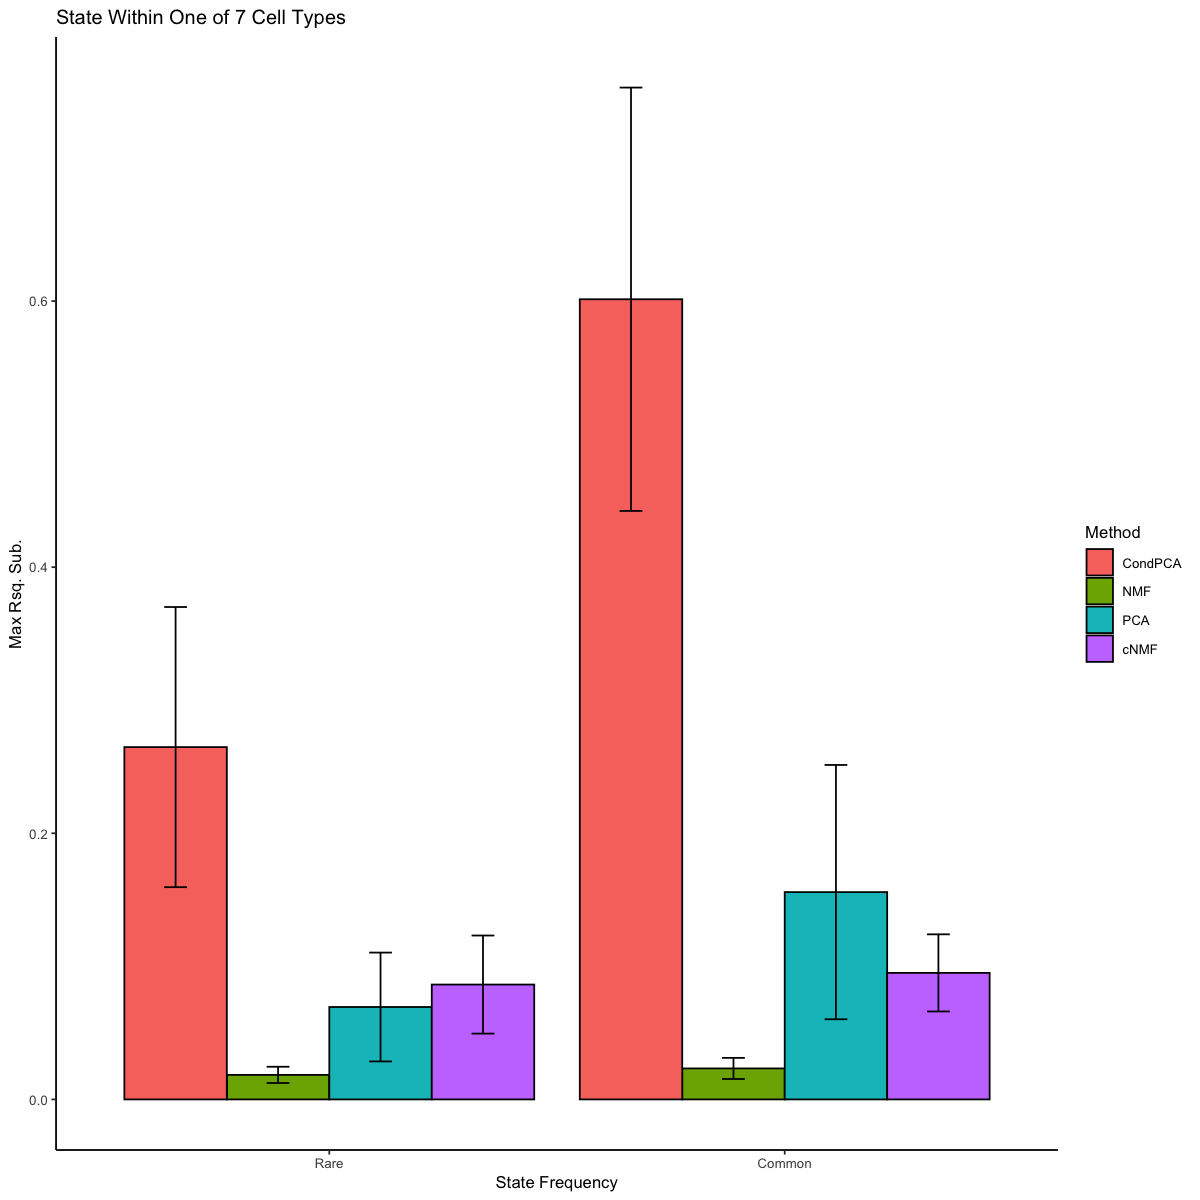

In [61]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(data=tmp_df, aes(x=Freq, y=max.rsq_sub, fill=method)) +
         geom_bar(stat="identity", color="black", position=position_dodge()) +
  geom_errorbar(aes(ymin=max.rsq_sub-conf_int_max.rsq_sub, ymax=max.rsq_sub+conf_int_max.rsq_sub), width=.2,
                 position=position_dodge(0.9)) + ggtitle("State Within One of 7 Cell Types") + ylab("Max Rsq. Sub.") + theme_classic()+
    theme(text = element_text(size=10))+labs(fill="Method")+xlab("State Frequency")